**잘못된 높은 학습률로 MNIST 모델 훈련하기**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 1127.5515 - accuracy: 0.3523 - val_loss: 3.3003 - val_accuracy: 0.2025
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 7.4406 - accuracy: 0.2134 - val_loss: 2.2505 - val_accuracy: 0.2157
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 3.0351 - accuracy: 0.2126 - val_loss: 2.5602 - val_accuracy: 0.2345
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 2.6031 - accuracy: 0.2180 - val_loss: 2.3286 - val_accuracy: 0.1917
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 2.7988 - accuracy: 0.2181 - val_loss: 2.1038 - val_accuracy: 0.2280
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 2.4050 - accuracy: 0.2310 - val_loss: 2.0748 - val_accuracy: 0.2311
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 2.2445 - accuracy: 0.2234 - val_loss: 3.6207 - val_accuracy: 0.2492
Epo

**같은 모델을 적절한 학습률로 훈련하기**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.3781 - accuracy: 0.9133 - val_loss: 0.1842 - val_accuracy: 0.9520
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1398 - accuracy: 0.9645 - val_loss: 0.1578 - val_accuracy: 0.9643
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1126 - accuracy: 0.9744 - val_loss: 0.2278 - val_accuracy: 0.9597
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1036 - accuracy: 0.9778 - val_loss: 0.1767 - val_accuracy: 0.9697
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0911 - accuracy: 0.9819 - val_loss: 0.2398 - val_accuracy: 0.9689
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0819 - accuracy: 0.9836 - val_loss: 0.2405 - val_accuracy: 0.9700
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0741 - accuracy: 0.9864 - val_loss: 0.2227 - val_accuracy: 0.9748
Epoch 

### 구조에 대해 더 나은 가정하기

### 모델 용량 늘리기

**MNIST 데이터를 사용한 간단한 로지스틱 회귀 모델**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.6708 - accuracy: 0.8349 - val_loss: 0.3596 - val_accuracy: 0.9038
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3522 - accuracy: 0.9026 - val_loss: 0.3089 - val_accuracy: 0.9152
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3162 - accuracy: 0.9117 - val_loss: 0.2901 - val_accuracy: 0.9185
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2998 - accuracy: 0.9163 - val_loss: 0.2812 - val_accuracy: 0.9196
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2903 - accuracy: 0.9187 - val_loss: 0.2749 - val_accuracy: 0.9236
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2835 - accuracy: 0.9206 - val_loss: 0.2741 - val_accuracy: 0.9244
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2782 - accuracy: 0.9227 - val_loss: 0.2694 - val_accuracy: 0.9246
Epoch 

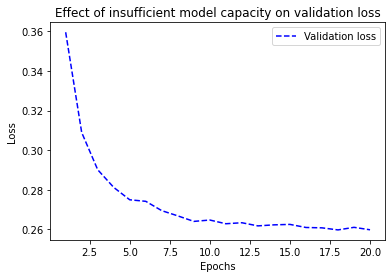

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.3613 - accuracy: 0.8980 - val_loss: 0.2050 - val_accuracy: 0.9401
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1603 - accuracy: 0.9523 - val_loss: 0.1302 - val_accuracy: 0.9623
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1145 - accuracy: 0.9659 - val_loss: 0.1135 - val_accuracy: 0.9668
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0876 - accuracy: 0.9737 - val_loss: 0.1044 - val_accuracy: 0.9691
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0710 - accuracy: 0.9789 - val_loss: 0.1364 - val_accuracy: 0.9583
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0581 - accuracy: 0.9821 - val_loss: 0.1086 - val_accuracy: 0.9691
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0483 - accuracy: 0.9853 - val_loss: 0.0935 - val_accuracy: 0.9746
Epoch 